In [65]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [66]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [67]:
model = tf.keras.models.load_model('/content/1')

In [68]:
import os

path = "PlantVillage"
contents = os.listdir(path)
print(contents)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [69]:
path = "PlantVillage"
contents = os.listdir(path)

if ".ipynb_checkpoints" in contents:
    checkpoints_path = os.path.join(path, ".ipynb_checkpoints")
    os.rmdir(checkpoints_path)
    print(".ipynb_checkpoints directory deleted.")
else:
    print(".ipynb_checkpoints directory not found.")

.ipynb_checkpoints directory not found.


In [70]:
test_set=tf.keras.preprocessing.image_dataset_from_directory(
       "PlantVillage",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 102 files belonging to 3 classes.


In [71]:
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [72]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)#create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class= class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 54ms/step


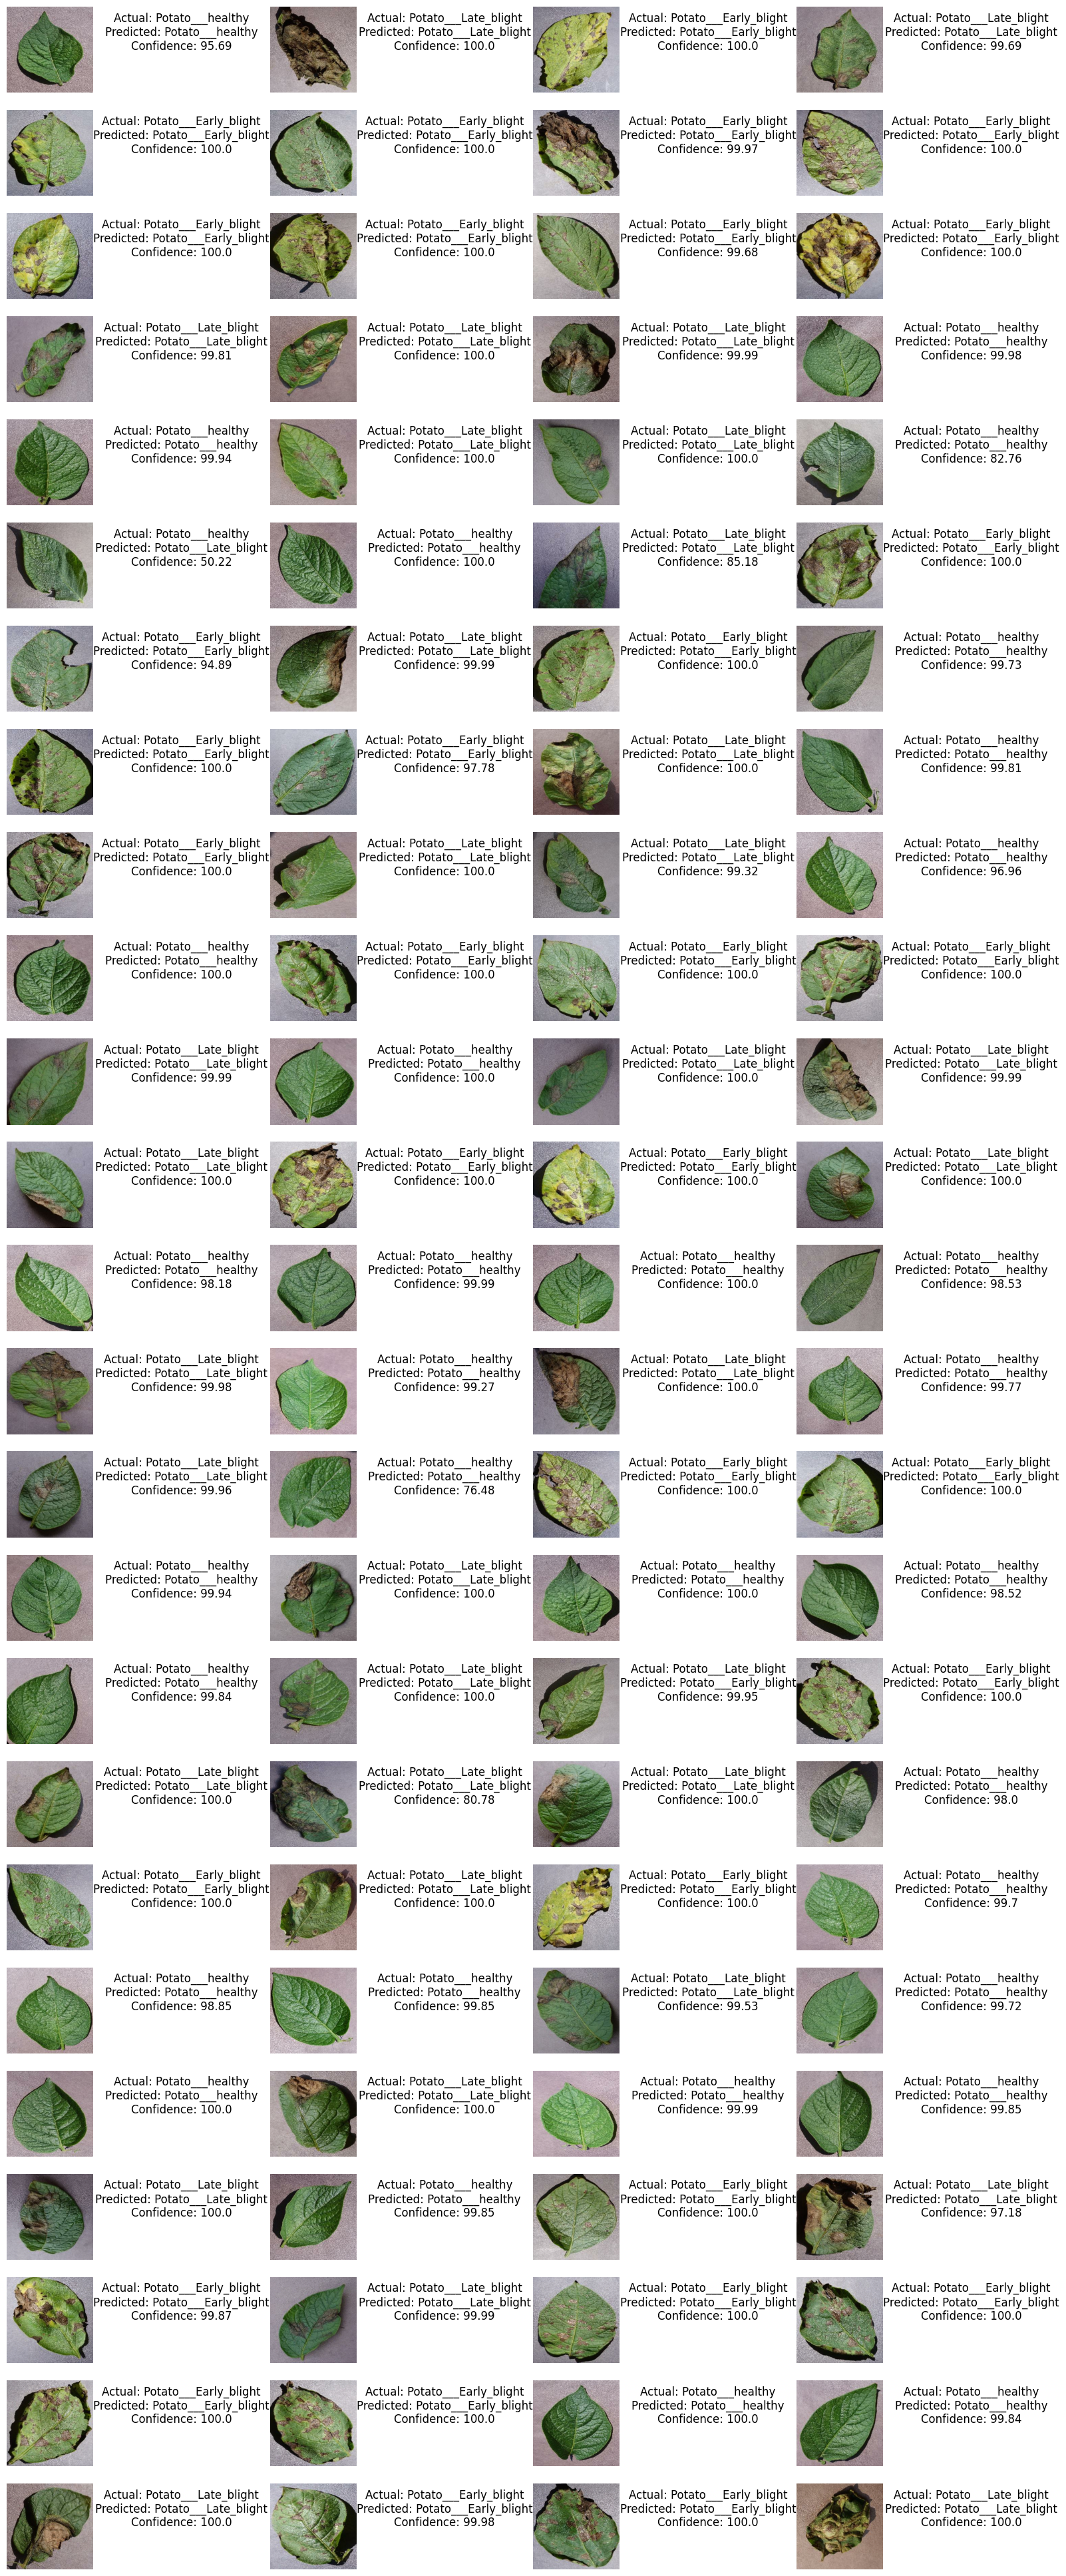

In [73]:
plt.figure(figsize=(20, 50))

count = 0
for images, labels in test_set.take(4):
    for i in range(len(images)):
        plt.subplot(25, 8, count * 2 + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.subplot(25, 8, count * 2 + 2)
        plt.text(0.5, 0.5, f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}",
                 fontsize=12, ha='center')
        plt.axis("off")

        count += 1
        if count == 100:
            break

    if count == 100:
        break